<ipython-input-1-73aa7618ca31>:22: RuntimeWarning: invalid value encountered in scalar divide
  return joint_density(x, y) / marginal_density_x(x)
<ipython-input-1-73aa7618ca31>:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, _ = quad(integrand, -np.inf, np.inf)
<ipython-input-1-73aa7618ca31>:15: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, _ = quad(integrand, -np.inf, np.inf)


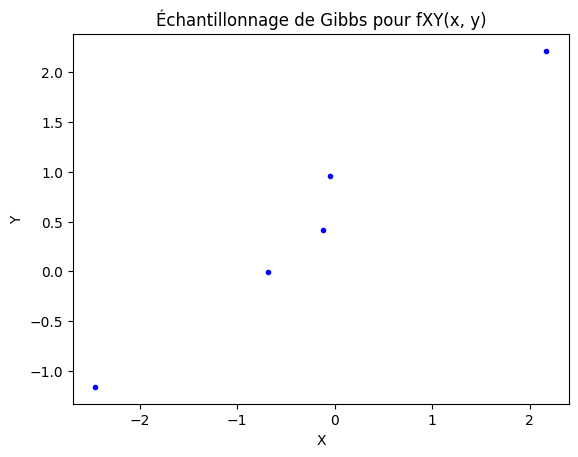

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def joint_density(x, y):
    return np.exp(-y**2 / 2 - x**2 * (1 + y + y**2) / 2)

def marginal_density_y(y):
    integrand = lambda x: joint_density(x, y)
    result, _ = quad(integrand, -np.inf, np.inf)
    return result

def marginal_density_x(x):
    integrand = lambda y: joint_density(x, y)
    result, _ = quad(integrand, -np.inf, np.inf)
    return result

def conditional_density_x_given_y(x, y):
    return joint_density(x, y) / marginal_density_y(y)

def conditional_density_y_given_x(y, x):
    return joint_density(x, y) / marginal_density_x(x)

def gibbs_sampling(iterations):
    samples = np.zeros((iterations, 2))
    x, y = 0, 0  # Initialisation arbitraire

    for i in range(iterations):
        # Échantillonnage conditionnel de X
        x = np.random.normal(loc=0, scale=1/np.sqrt(conditional_density_x_given_y(x, y)))

        # Échantillonnage conditionnel de Y
        y = np.random.normal(loc=0, scale=1/np.sqrt(conditional_density_y_given_x(y, x)))

        samples[i, :] = [x, y]

    return samples

# Nombre d'itérations
iterations = 1000

# Échantillonnage de Gibbs
samples = gibbs_sampling(iterations)

# Tracé des échantillons
plt.scatter(samples[:, 0], samples[:, 1], marker='.', color='blue')
plt.title('Échantillonnage de Gibbs pour fXY(x, y)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



